# MODELING COVID-19:

### PREDICTING SOCIAL VULNERABILITY INDEX THROUGH INFECTION RATE ACROSS US COUNTIES
                                                         


**Collaborators**: Abdul Choudhry, Phuong Thao Nguyen, Sanjana Shah

In this project, we aim to answer the following questions:
1. How have social distancing efforts affected the rate at which the virus has increased or decreased its spread?
2. What does the social vulnerability index tell us about how prepared each respective county was in response to COVID-19 preparedness?

In [1]:
# Import libraries

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from datetime import date 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

### Setting up Files 

In [2]:
# Import csv data

time_series_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
time_series_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
states = pd.read_csv('4.18states.csv')
counties = pd.read_csv('abridged_couties.csv')
svi = pd.read_csv('SVI2018_US_COUNTY.csv')

# <br/><br/><br/>

---

## Part 1: Cleaning Data 

### Loading the Data

In [3]:
time_series_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,1,1,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,370,429,472,472,514,550


In [4]:
time_series_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,1,1,1
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,3,3,3,0,0,0,0,0,0,0
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,8,9,12,12,15,17


In [5]:
states

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76,3,73.0,0.0,NaN,0.305589,NaN,NaN,3.947368,15629,CHN,NaN,NaN
136,Yukon,Canada,NaN,64.2823,-135.0000,9,0,0.0,9.0,NaN,21.909538,NaN,NaN,0.000000,12412,CAN,NaN,NaN
137,Yunnan,China,NaN,24.9740,101.4870,184,2,177.0,5.0,NaN,0.380952,NaN,NaN,1.086957,15630,CHN,NaN,NaN
138,Zhejiang,China,NaN,29.1832,120.0934,1268,1,1246.0,21.0,NaN,2.210214,NaN,NaN,0.078864,15631,CHN,NaN,NaN


In [6]:
counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
svi

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",5860.869195,39307,0,20044,...,0,0,0,1,-999,4160,588,10.6,1.5,32290
1,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.443459,55200,0,23315,...,0,0,0,0,0,3875,508,7.1,0.9,37301
2,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.830460,57645,0,24222,...,0,0,0,0,0,6303,732,11.0,1.3,40036
3,1,ALABAMA,AL,Butler,1013,"Butler County, Alabama",776.838201,20025,0,10026,...,0,0,0,0,0,2005,340,10.2,1.7,17280
4,1,ALABAMA,AL,Calhoun,1015,"Calhoun County, Alabama",605.867251,115098,0,53682,...,0,0,0,0,0,10686,796,9.4,0.7,117894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,48,TEXAS,TX,Duval,48131,"Duval County, Texas",1793.476183,11355,0,5592,...,1,1,0,2,10,2656,406,24.5,3.7,9592
3138,48,TEXAS,TX,Zapata,48505,"Zapata County, Texas",998.411980,14369,0,6388,...,1,0,0,2,10,4206,484,29.3,3.4,10924
3139,48,TEXAS,TX,Zavala,48507,"Zavala County, Texas",1297.406535,12131,0,4344,...,1,1,0,2,10,2194,354,18.4,3.0,10672
3140,48,TEXAS,TX,Dimmit,48127,"Dimmit County, Texas",1328.884075,10663,0,4408,...,1,1,0,2,11,2345,539,22.2,5.1,8229


In [8]:
# Cleaning abridged_couties.csv dataframe

# Filter out the US counties
counties.dropna(subset = ['countyFIPS'], inplace = True)
counties.dropna(subset = ['STATEFP'], inplace = True)
counties.dropna(subset = ['State'], inplace = True)
counties.drop(counties.tail(2).index, inplace = True)

# Remove 0's from start of FIPS
counties.loc[:, 'countyFIPS'] = counties.loc[:, 'countyFIPS'].astype(int)

# Convert columns to int type
counties['countyFIPS'] = counties['countyFIPS'].astype(int)
counties['STATEFP'] = counties['STATEFP'].astype(int)
counties['COUNTYFP'] = counties['COUNTYFP'].astype(int)

In [9]:
# Cleaning 4.18states.csv dataframe
states.dropna(subset = ['FIPS'], inplace = True)

# Filter out the US states
states = states[states['FIPS'].notna()]
states = states[states['FIPS'] < 60]

# Remove Alaska and Hawaii since they are not in the counties data
states = states[states['FIPS'] != 2]
states = states[states['FIPS'] != 15]

# Convert column to int type
states['FIPS'] = states['FIPS'].astype(int)

In [10]:
# Cleaning time_series_covid19_confirmed_US.csv
time_series_confirmed.dropna(subset = ['FIPS'], inplace = True)

# Filter out data that is Unassigned and Out of State
time_series_confirmed = time_series_confirmed[time_series_confirmed['FIPS'] > 100]
time_series_confirmed = time_series_confirmed[(time_series_confirmed['FIPS'] != 88888) & (time_series_confirmed['FIPS'] != 99999)]
time_series_confirmed['FIPS'] = time_series_confirmed['FIPS'].astype(int)

# Create STATEFP based off of fips and use it to filter out Alaska and Hawaii
time_series_confirmed['STATEFP'] = time_series_confirmed['FIPS'].apply(lambda x: x // 1000)
time_series_confirmed = time_series_confirmed[(time_series_confirmed['STATEFP'] != 2) & (time_series_confirmed['STATEFP'] != 15)]
time_series_confirmed = time_series_confirmed[(time_series_confirmed['STATEFP'] < 80)]

In [11]:
# Cleaning time_series_covid19_deaths_US.csv
time_series_deaths.dropna(subset = ['FIPS'], inplace = True)

# Filter out data that is Unassigned and Out of State
time_series_deaths = time_series_deaths[time_series_deaths['FIPS'] > 100]
time_series_deaths = time_series_deaths[(time_series_deaths['FIPS'] != 88888) & (time_series_deaths['FIPS'] != 99999)]
time_series_deaths['FIPS'] = time_series_deaths['FIPS'].astype(int)

# Create STATEFP based off of fips and use it to filter out Alaska and Hawaii
time_series_deaths['STATEFP'] = time_series_deaths['FIPS'].apply(lambda x: x // 1000)
time_series_deaths = time_series_deaths[(time_series_deaths['STATEFP'] != 2) & (time_series_deaths['STATEFP'] != 15)]
time_series_deaths = time_series_deaths[(time_series_deaths['STATEFP'] < 80)]

In [12]:
# Merge time_series_confirmed data with counties data to obtain dataframe of information
# for counties along with information for COVID-19's affect on each county
sth_inner = pd.merge(time_series_confirmed, counties, left_on='FIPS', right_on='countyFIPS', how='inner')
pd.set_option('display.max_columns', None)
sth_inner.head(80)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,STATEFP_x,countyFIPS,STATEFP_y,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,84001001,US,USA,840,1001,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,1,1001,1,1,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,84001003,US,USA,840,1003,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,1,1003,1,3,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,57

In [13]:
def clean_999(dft):
    """
    Remove -999 and -999.0 values from data frame and replace with the mean
    of values that are not -999 or -999.0.
    Input (dft): data frame dft with -999 or -999.0 values.
    Output: data frame with no -999 or -999.0 values
    """
    df = dft.copy()
    for i in df.columns[7:]:
        if -999.0 in df[i].array or -999 in df[i].array:
            k = [y for y in df[i] if y != -999.0]
            l = int(np.mean([y for y in k if y != -999]))
            df[i] = df[i].replace(-999.0, l)
            df[i] = df[i].replace(-999, l)
    return df

# Remove the -999 and -999.0 values from svi data frame
svi = clean_999(svi)
svi = svi[svi['FIPS'].isin(sth_inner['countyFIPS'].array)]

# Merge svi data frame with sth_inner to obtain data frame containing information
# regarding features for each county's social vulnerability, information for confirmed cases
# overtime per county, and abridged county data.
svi_merge = pd.merge(svi, sth_inner, left_on='FIPS', right_on='countyFIPS', how='inner')

# Fill NaN values with 0 and drop repeated columns
svi_merge['SVIPercentile'] = svi_merge['SVIPercentile'].fillna(0)
svi_merge = svi_merge.drop(columns = ['Admin2','Province_State', 'Country_Region', 
                          'Combined_Key', 'CountyName', 'State', 
                          'CensusRegionName', 'CensusDivisionName', 
                          'iso2', 'iso3', 'StateName'  ])

def replace_nan(dfi):
    """
    Replace NaN values with with the mean of values that are not NaN.
    Input (dft): data frame dft with NaN values.
    Output: data frame with no NaN values
    """
    df = dfi.copy()
    for i in df.columns[6:]:
        average = np.nanmean(df[i])
        df[i] = df[i].fillna(average)
    return df

# List of the columns we want to scale by a factor of 100 since values are between 0 and 1
rescale = ['FracMale2017', 'dem_to_rep_ratio', 'RPL_THEMES', 'EPL_GROUPQ', 'EPL_NOVEH', 'EPL_CROWD', 
'EPL_MOBILE', 'EPL_MUNIT', 'RPL_THEME3', 'EPL_LIMENG', 'EPL_MINRTY', 
'RPL_THEME2', 'EPL_SNGPNT', 'EPL_DISABL', 'EPL_AGE17', 'EPL_AGE65', 'RPL_THEME1', 'EPL_NOHSDP',
'EPL_NOHSDP', 'EPL_PCI', 'EPL_UNEMP', 'EPL_POV','MP_GROUPQ']

def scale_float(dfi, scale):
    """
    Scale columns by a factor of 100 that have values between 0 and 1.
    Input (dft): data frame with columns that have values between 0 and 1.
    Input (scale): column names that have values between 0 and 1.
    Output: data frame whose columns do not have values between 0 and 1.
    """
    df = dfi.copy()
    for i in scale:
        df[i] = df[i] * 100
        df[i] = df[i].astype(int)
    return df

# Remove NaN values and scale columns in rescale by a factor of 100
svi_merge = replace_nan(svi_merge)
svi_merge = scale_float(svi_merge , rescale)
svi_merge

,ST,STATE,ST_ABBR,COUNTY,FIPS_x,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,UID,code3,FIPS_y,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,STATEFP_x,countyFIPS,STATEFP_y,COUNTYFP,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",5860.869195,39307,0,20044,71,12398,439,14086,884,3026,273,27036,1604,3669,426,7083,25,9318,14,6280,495,1330,285.0,34397,145.0,755,209.5,67,37.1,7770,431,264,77.1,763,160,654,142,15.0,2.0,5.0,1.0,27036.0,1604.0,13.8,1.6,18.0,0.1,23.7,0.0,16.1,1.3,10.7,2.3,87.5,0.4,2.1,0.6,0.3,0.2,38.8,2.2,2.1,0.6,6.2,1.3,1.7,40,0,0,0,5900,1.0000,0,48,68,56,83,2.5712,87,99,77,1.7657,92,5,98,54,57,41,2.5832,0.5409,7.0000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,4160,588,10.6,1.5,32290,84035039,840,35039,36.510721,-106.693167,0,0,0,

# Part 2: Visual Model & EDA

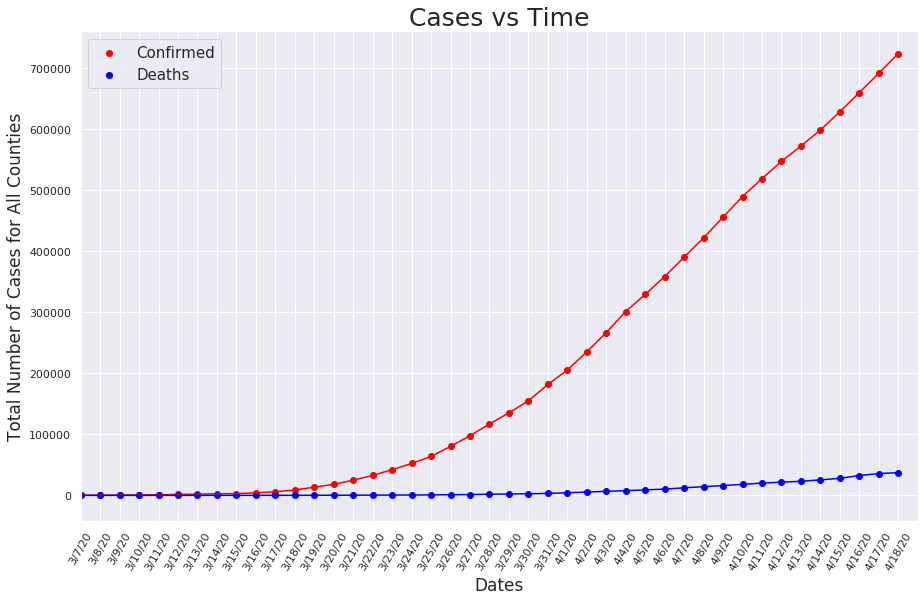

In [14]:
# Analysis of the relationship between the number of confirmed cases and the number of deaths 
# with respect to a time interval of interest to us (March 7th to April 18th).

# Confirmed dates represents a data frame consisting of columns of the dates from Match 7th to April 18th.
confirmed_dates = time_series_confirmed.iloc[:, 11:]

# Drop STATEFP from data frame
confirmed_dates = confirmed_dates.drop(confirmed_dates.columns[-1], axis = 1)

# Fill NaN values with 0 and take a list of column names
confirmed_dates.fillna(0)
confirmed_dates_lst = list(confirmed_dates.columns)

# For each date, sum up all the confirmed cases across all counties
confirmed_sum = []
for i in confirmed_dates.columns:
    confirmed_sum.append(sum(confirmed_dates[i]))
    
# Death dates represents a data frame consisting of columns of the dates from Match 7th to April 18th.
death_dates = time_series_deaths.iloc[:, 12:]

# Drop STATEFP from data frame
death_dates = death_dates.drop(death_dates.columns[-1], axis = 1)

# Fill NaN values with 0 and take a list of column names
death_dates.fillna(0)
death_dates_lst = list(death_dates.columns)

# For each date, sum up all the death cases across all counties
deaths_sum = []
for i in death_dates.columns:
    deaths_sum.append(sum(death_dates[i]))
    
plt.figure(figsize = (15, 9))

# Create two scatter and line plots to look at the difference in cases overtime
plt.scatter(confirmed_dates_lst, confirmed_sum, c = 'red', norm = True, label = "Confirmed")
plt.plot(confirmed_dates_lst, confirmed_sum, c = 'red')
plt.scatter(death_dates_lst, deaths_sum, c = 'blue', norm = True, label = "Deaths")
plt.plot(death_dates_lst, deaths_sum, c = 'blue')

plt.xlabel('Dates', size = 17)
plt.xlim(45, 88)
plt.ylabel('Total Number of Cases for All Counties', size = 17)
plt.title('Cases vs Time', size = 25)
plt.xticks(rotation = 60)
plt.legend(prop={'size': 15})
plt.show()

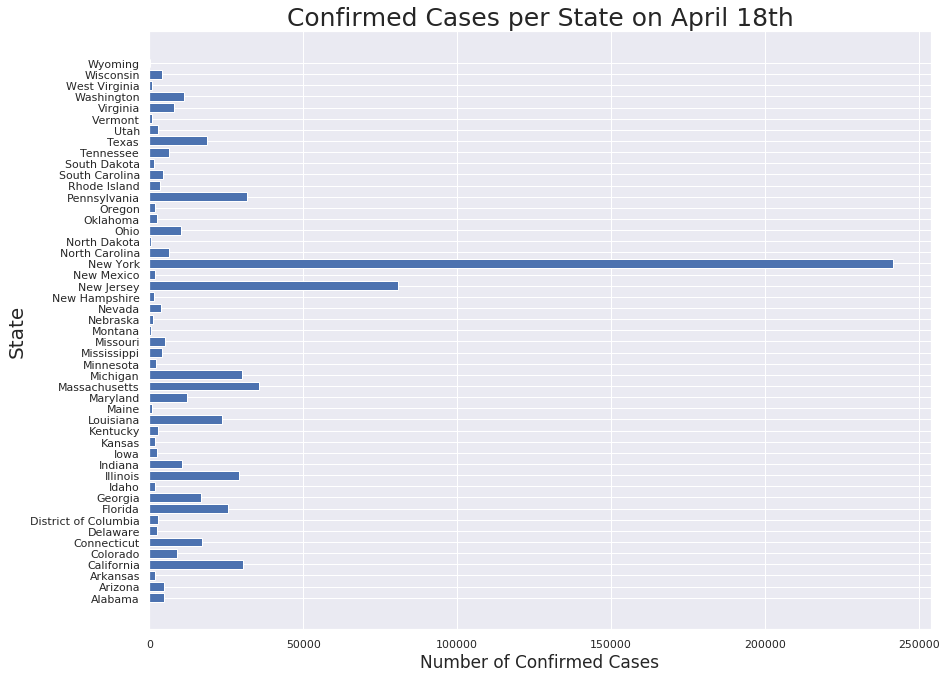

In [15]:
unique_states = list(time_series_confirmed['Province_State'].unique())
dates = time_series_confirmed.iloc[:, 11:].drop(labels = 'STATEFP', axis = 1).keys()
deaths_on_apr_18 = time_series_deaths[dates[-1]]
confirmed_cases_on_apr_18 = time_series_confirmed[dates[-1]]

# Total number of confirmed cases for each state

no_cases = []
confirmed_cases_per_state = []

for i in unique_states:
    state_cases = confirmed_cases_on_apr_18[time_series_confirmed['Province_State'] == i].sum()
    if state_cases > 0:
        confirmed_cases_per_state.append(state_cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_states.remove(i)
    
plt.figure(figsize = (14, 11))
plt.barh(unique_states, confirmed_cases_per_state)
plt.title('Confirmed Cases per State on April 18th', size = 25)
plt.xlabel('Number of Confirmed Cases', size = 17)
plt.ylabel('State', size = 20)
plt.show()

## Confirmed Rate Before and After Enactment

In [16]:
def convert_date_to_normal(ordinal):
    """
    Convert the dates when the enactment starts to normal date
    Input (ordinal): list of int ordinal times
    Output: list of string regular times
    """
    dat = []
    for i in ordinal:
        if i > 0:
            d = date.fromordinal(int(i))
            d = d.strftime("%m/%d/%y")[1:]
            dat.append(d)
        else:
            dat.append('4/18/20')
    for i in np.arange(len(dat)):
        if (dat[i][dat[i].find('/') + 1] == '0'):
            dat[i] = dat[i].replace('0', '', 1)
    return dat
            
# Stay at home inner merge, creating data frame consisting of county data from abridged_counties.csv and
# confirmed cases per county overtime
sth_inner = pd.merge(time_series_confirmed, counties, left_on='FIPS', right_on='countyFIPS', how='inner')
sth_county_time = convert_date_to_normal(sth_inner['stay at home'].fillna(0))

def find_rate(df, checkpoint, time, b):
    """
    Get the rate of confirmed cases 
    Input(df): the dataframe you are using
    Input(checkpoint): date of where you want to start or end
    Input(time): list of when the enactment time start
    Input(b): boolean of whether the rate if from the begining to enact time or from enact time to present
    Output: List of rate
    """
    rate = []
    for i in np.arange(len(df)):
        if b == True:
            countyi = df.loc[i, checkpoint : time[i]]
            rate.append(np.mean(countyi))
        else:
            countyi = df.loc[i, time[i]: checkpoint]
            rate.append(np.mean(countyi))        
    return rate

# Lists of rates of confirmed cases for COVID-19 from before and after stay at home order enactment
before = find_rate(sth_inner, '1/22/20',sth_county_time , True)
after = find_rate(sth_inner, '4/18/20',sth_county_time , False)

# Append lists as columns to sth_inner
sth_inner['Rate After Stay at Home Order'] = after
sth_inner['Rate Before Stay at Home Order'] = before

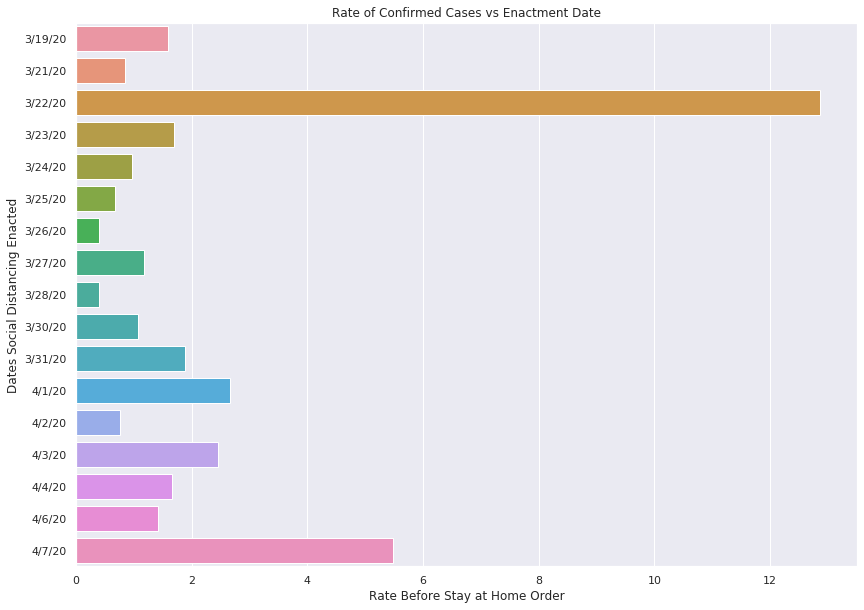

In [17]:
# Create visualization showing rates before stay at home order was enacted
rate_before = sth_inner['Rate Before Stay at Home Order'].values
county_names = sth_inner['CountyName'].values
grouped = sth_inner.groupby(by = 'stay at home').agg(np.mean)
grouped_rate_before = grouped['Rate Before Stay at Home Order']
grouped_ordinal_before = grouped_rate_before.index.to_numpy()
grouped_date_before = convert_date_to_normal(grouped_ordinal_before)
plt.figure(figsize = (14, 10))
sns.barplot(grouped_rate_before, grouped_date_before)
plt.ylabel('Dates Social Distancing Enacted')
plt.title('Rate of Confirmed Cases vs Enactment Date')
plt.show()

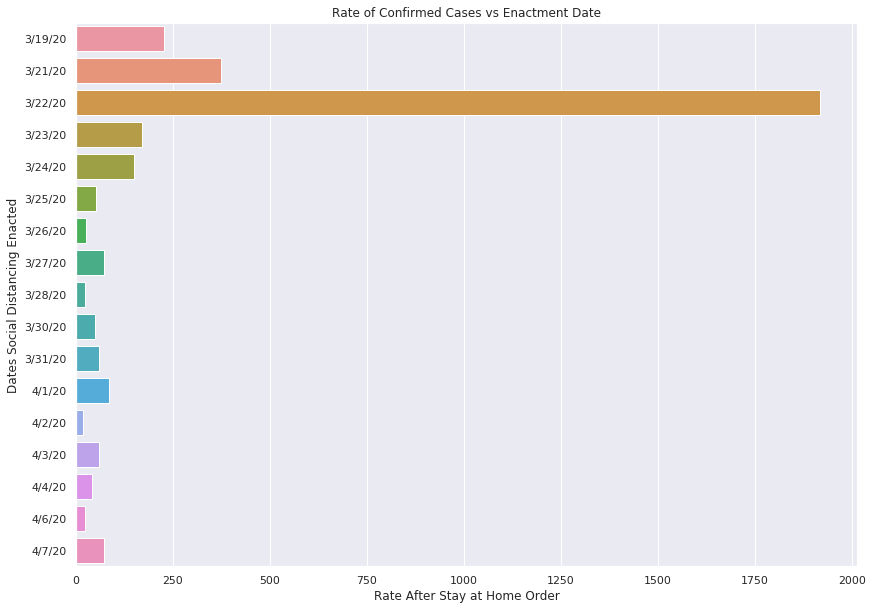

In [18]:
# Create visualization showing rates after stay at home order was enacted
rate_after = sth_inner['Rate After Stay at Home Order'].values
county_names = sth_inner['CountyName'].values
grouped = sth_inner.groupby(by = 'stay at home').agg(np.mean)
grouped_rate_after = grouped['Rate After Stay at Home Order']
grouped_ordinal_after = grouped_rate_after.index.to_numpy()
grouped_date_after = convert_date_to_normal(grouped_ordinal_after)
plt.figure(figsize = (14, 10))
sns.barplot(grouped_rate_after, grouped_date_after)
plt.ylabel('Dates Social Distancing Enacted')
plt.title('Rate of Confirmed Cases vs Enactment Date')
plt.show()

In [19]:
def state_date(state, order):
    '''
    Returns the ordinal,date that a state enacted a stay at home order
    Input (state): string name of state
    Input (order): string name of order
    Output: int ordinal, state
    '''
    
    state_ordinal = counties[(counties['State'] == state)][order].values[0].astype(int)
    state_date = date.fromordinal(state_ordinal)
    state_date = state_date.strftime("%m/%d/%y")[1:]
    return state_ordinal, state_date

NY_ordinal, NY_date = state_date('New York', 'stay at home')
NY_ordinal, NY_date

(737506, '3/22/20')

The state with the highest average rate after social distancing was enacted is New York.
Date at which highest rate of enactment occurs: 3/22/20

## Distributions of Confirmed Cases Before & After Enactment

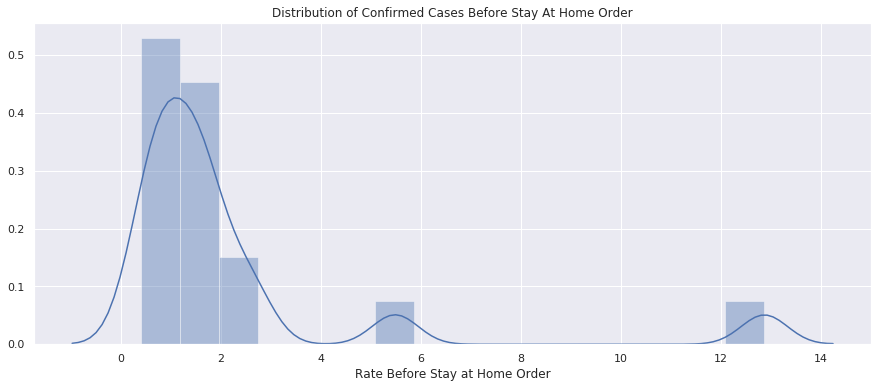

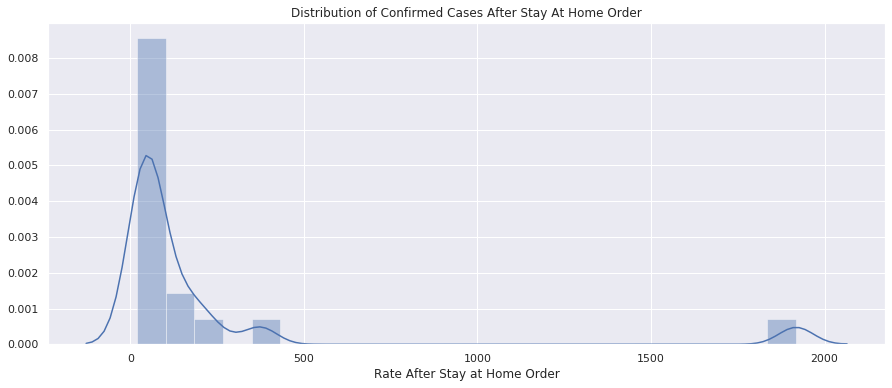

In [20]:
# Visualizations to show the distribution in rates of confirmed cases by stay at home order enactment
# before and after stay at home order enactment.

plt.figure(figsize = (15,13))
plt.subplot(2, 1, 1)
plt.title("Distribution of Confirmed Cases Before Stay At Home Order")
sns.distplot(grouped_rate_before, hist = True, label = 'Before')

plt.figure(figsize = (15,13))
plt.subplot(2, 1, 1)
plt.title("Distribution of Confirmed Cases After Stay At Home Order")
sns.distplot(grouped_rate_after, hist = True, label = 'After')

plt.show()

The distribution of both before and after stay at home order are right-skew. This shows that more states have fewer cases. However, you cannot infer that stay at home order increase the rate of confirmed cases, because there is not enough data and the distribution percentage is much lower in the stay at home order.

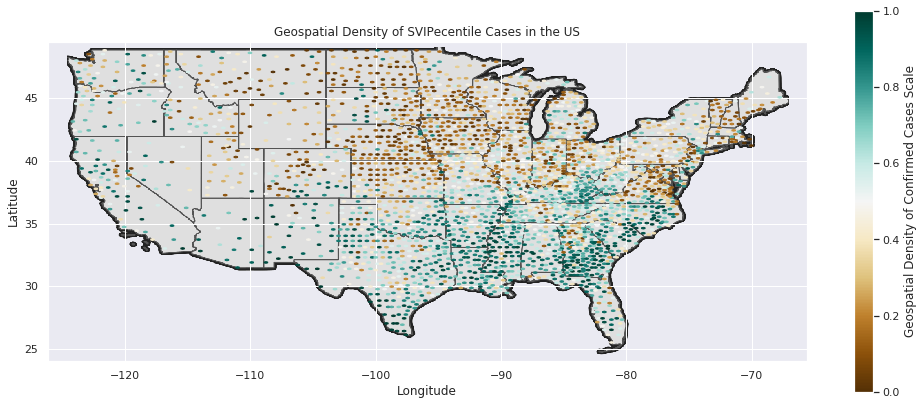

In [21]:
# Visualization for SVIPercentile per county

# Each point represents a US county and the color corresponds to its respective SVI Percentile.

# The browner the point, the lower it is on the Geospatial Density Scale, and therefore
# the lower the Social Vulnerability Index. This means that the county is less socially vulnerable.
# he bluer the point, the higher it is on the Geospatial Density Scale, and therefore
# the higher the Social Vulnerability Index. This means that the county is more socially vulnerable.

# Get the minimum and maximum longitudes and latitudes
min_lon = svi_merge['lon'].min()
max_lon = svi_merge['lon'].max()
min_lat = svi_merge['lat'].min()
max_lat = svi_merge['lat'].max()

# Create map boundaries and set the size of the resulting plot
map_bound = ((min_lon - 0.5, max_lon + 0.5, min_lat - 1, max_lat + 0.2))
fig, ax = plt.subplots(figsize = (17, 7))
basemap = plt.imread('./us.png')
ax.set_xlim(map_bound[0] - 1.5, map_bound[1] + 1.5)
ax.set_ylim(map_bound[2] - 0.5, map_bound[3] + 0.5)

# Create hexbin plot for rate of confirmed cases after stay at home order
plotplt = plt.hexbin(x=svi_merge['lon'],  y=svi_merge['lat'], cmap = 'BrBG',
                     C=svi_merge['SVIPercentile'], gridsize=200, 
                     vmin=svi_merge['SVIPercentile'].min(), vmax=svi_merge['SVIPercentile'].max())
color_scale = fig.colorbar(plotplt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Geospatial Density of SVIPecentile Cases in the US")
color_scale.ax.set_ylabel("Geospatial Density of Confirmed Cases Scale")

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal')
plt.show()

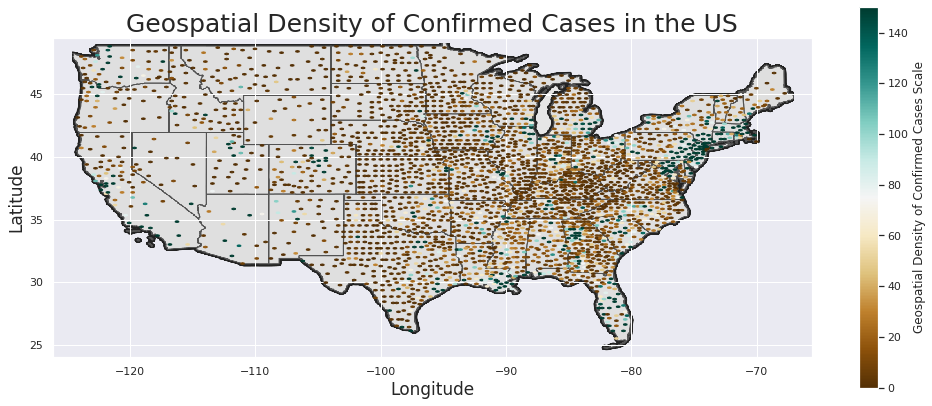

In [22]:
# Visualization for Rate of Confirmed Cases per county after Stay at Home Order Enacted

# Each point represents a US county and the color corresponds to its respective rate of
# confirmed cases after date of stay at home order enactment.

# The browner the point, the lower the rate of confirmed cases for each county, and therefore
# the less it was impacted by COVID-19. The bluer the point, the higher the rate of confirmed
# cases for each county, and therefore the more it was impacted by COVID-19.

# Get the minimum and maximum longitudes and latitudes
min_lon = sth_inner['lon'].min()
max_lon = sth_inner['lon'].max()
min_lat = sth_inner['lat'].min()
max_lat = sth_inner['lat'].max()

# Create map boundaries and set the size of the resulting plot
map_bound = ((min_lon - 0.5, max_lon + 0.5, min_lat - 1, max_lat + 0.2))
fig, ax = plt.subplots(figsize = (17, 7))
basemap = plt.imread('./us.png')
ax.set_xlim(map_bound[0] - 1.5, map_bound[1] + 1.5)
ax.set_ylim(map_bound[2] - 0.5, map_bound[3] + 0.5)

# Create hexbin plot for rate of confirmed cases after stay at home order
plotplt = plt.hexbin(x=sth_inner['lon'],  y=sth_inner['lat'], 
                     C=sth_inner['Rate After Stay at Home Order'], gridsize=200, 
                     vmin=sth_inner['Rate After Stay at Home Order'].min(), 
                     vmax=150, cmap = 'BrBG')
color_scale = fig.colorbar(plotplt)

plt.xlabel('Longitude', size = 17)
plt.ylabel('Latitude', size = 17)
plt.title("Geospatial Density of Confirmed Cases in the US", size = 25)
color_scale.ax.set_ylabel("Geospatial Density of Confirmed Cases Scale")

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal')
plt.show()

# Part 3:  Feature Selection & Modeling

In the below cell, we initially tried to find the features in the sth_inner dataframe that 
have the highest correlation with one another using a seaborn heatmap visualization. 

In [23]:
def select_columns(data, columns):
    """
    Get a data frame with only specific given columns
    Input(data): dataframe to choose specific columns from
    Input(columns): list of column names to choose
    Output: dataframe with specified columns only
    """
    return data.loc[:, columns]

def rmse(y, yhat):
    """
    Return the rmse given y and yhat
    Input(y): actual value
    Input(yhat): predicted value
    Output: root mean squared error between actual and predicted values
    """
    return np.sqrt(np.mean((y - yhat)**2))

def rmse_score(model, X, y):
    """
    Return the rmse score given the model, X, and y
    Input(model): model used to predict X
    Input (X): predicted values from model
    Input(y): actual value
    Output: root mean squared error score between actual and predicted values from a given model
    """
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

scaler = StandardScaler()

## Further Feature Selection & Standardization

We used scikitlearn’s built-in LassoCV linear model with iterative fitting along a regularization path to execute the feature selection process for us by passing in our newly created standardized feature matrix as an argument. This regularization method falls under an umbrella of embedded methods that penalize a feature given a coefficient threshold, which our Lasso model does. Using the ‘SVIPercentile’ as our response variable, we found that the best regularization parameter alpha, which is the amount of penalization chosen by cross-validation, is 0.001175. Out of all the 278 features within our feature matrix, our Lasso model picked 46 best features and eliminated the other 228 through this iterative process. The correlation coefficient threshold that we selected was 0.3, so out of the best 46 features that were most correlated with SVIPercentile that Lasso computed from our feature matrix, we chose the top 36 most correlated features with SVIPercentile, which is shown in the resulting bar plot visualization.

## Standardizing Features

### Which COVID-19 features best predict SVIPercentile across counties in the US?

In [24]:
# Take svi merge features that are useful when predicting SVIPercentile
svi_merge_features = svi_merge.iloc[:, 6:]
svi_merge_features = svi_merge_features.drop(columns = ['UID','code3', 
                                                       'FIPS_y', 'Lat',
                                                       'Long_', 'STATEFP_x',
                                                      'COUNTYFP', 'lat', 'lon',
                                                      'POP_LATITUDE', 'POP_LONGITUDE', 
                                                      'stay at home', '>50 gatherings',
                                                      '>500 gatherings', 'public schools',
                                                      'public schools', 'restaurant dine-in',
                                                      'entertainment/gym', 'federal guidelines', 
                                                      'foreign travel ban'])

### Creating Binary series to use in classification

In [25]:
# Assigining 1 if the SVIPercentile > 0.5 and 0 if < 0.5. 
svi_merge_features['SVIPercentile'] = [1 if i>=0.5 else 0 for i in svi_merge_features['SVIPercentile']]
svi_merge_features['SVIPercentile']

0       0
1       0
2       0
3       1
4       1
       ..
3067    1
3068    1
3069    1
3070    1
3071    1
Name: SVIPercentile, Length: 3072, dtype: int64

### Using LassoCV to find best features

Best alpha using built-in LassoCV: 0.001175
Best score using built-in LassoCV: 0.969616
Lasso picked 46 features
Lasso eliminated the other 228 features


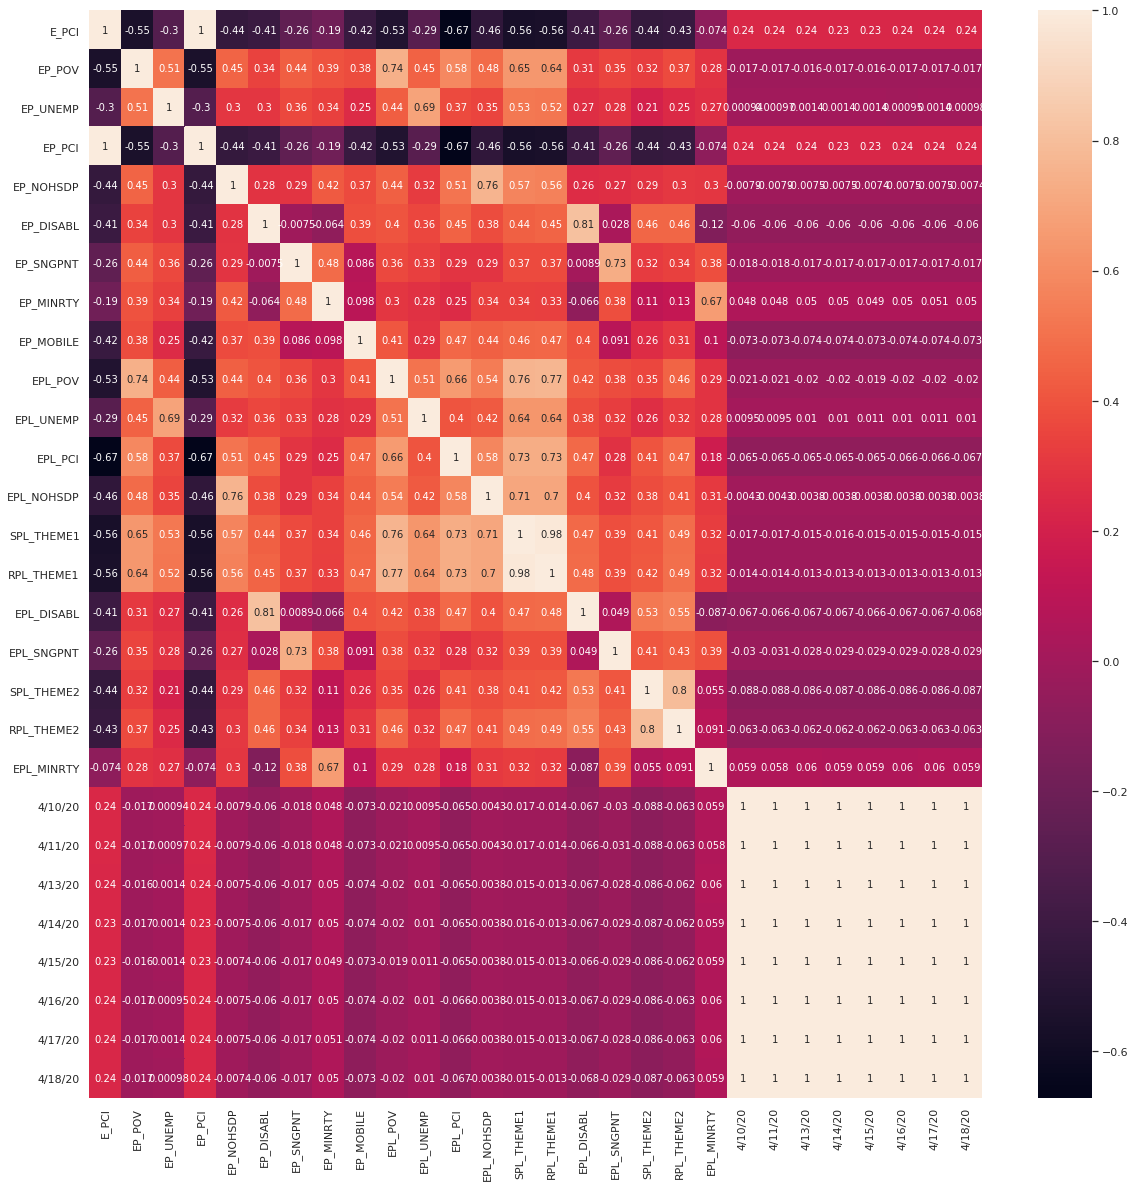

In [26]:
# Get the column for SVIPercentile from svi_merge_features
i = svi_merge_features['SVIPercentile']

# Standardize svi_merge_features
SVI_standardized = scaler.fit_transform(svi_merge_features.drop(columns = 'SVIPercentile'))
SVI_standardized = [x.astype(int) for x in SVI_standardized]
SVI_feature_standardized = pd.DataFrame(SVI_standardized, 
                            columns = svi_merge_features.drop(columns = 'SVIPercentile').columns)

# Create a column for SVIPercentile
SVI_feature_standardized['SVIPercentile'] = i

y = svi_merge['SVIPercentile']

# Use LassoCV linear model with iterative fitting along a regularization path to execute
# the feature selection process for us by passing in our newly created standardized feature matrix as an argument
reg2 = LassoCV(cv = 4, max_iter = 1000000)
reg2.fit(SVI_feature_standardized, y)

print("Best alpha using built-in LassoCV: %f" % reg2.alpha_)
print("Best score using built-in LassoCV: %f" %reg2.score(SVI_feature_standardized, y))

coef2 = pd.Series(reg2.coef_, index = SVI_feature_standardized.columns)

print("Lasso picked " + str(sum(coef2 != 0)) + " features")
print("Lasso eliminated the other " + str(sum(coef2 == 0)) + " features")

cor = SVI_feature_standardized.corr()
cor_target = abs(cor['SVIPercentile'])

# Selecting top 20 highly correlated features
SVI_relevant_features = cor_target[cor_target>0.3]
SVI_relevant_features = [i for i in SVI_relevant_features.index.array][:20]

# Add columns for confirmed cases from 4/10/20 to 4/18/20, forcing columns relevant
# to rate of confirmed cases of COVID-19
COVID_dates = SVI_feature_standardized[['4/10/20', '4/11/20', '4/13/20', 
                                       '4/14/20', '4/15/20', '4/16/20', 
                                       '4/17/20', '4/18/20']]

COVID_dates_lst = list(COVID_dates.columns)
model_features = SVI_relevant_features + COVID_dates_lst

# Heatmap of corrlation of features we want to use
plt.figure(figsize = (20, 20))
sns.heatmap(SVI_feature_standardized[model_features].corr(), annot = True)

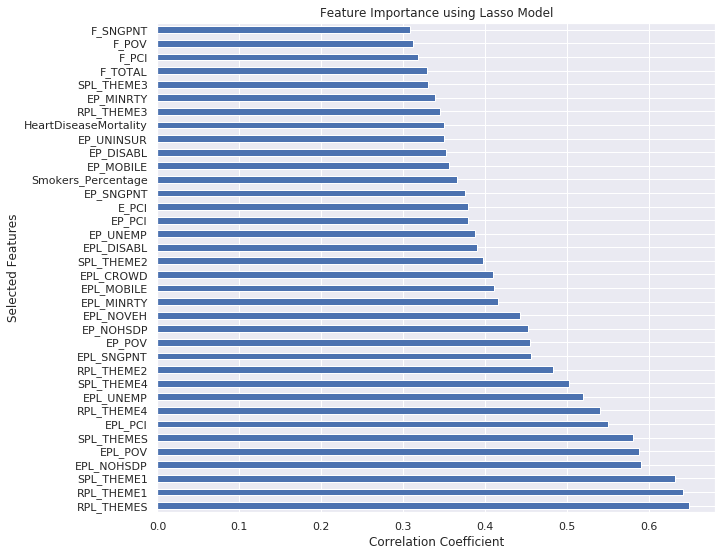

In [27]:
# Visualization of features in order of importance using Lasso Model
good_features = cor_target[cor_target>0.3].sort_values(ascending = False)[1:]
plt.figure(figsize = (10, 9))
good_features.plot(kind = "barh")
plt.title("Feature Importance using Lasso Model")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Selected Features')
plt.show()

# Classification and Re-Modeling 

Using the features collected from our Lasso model, we now perform classification on training and testing sets using LogisticRegressionCV Model, Linear Regression, Decision Trees, and Random Forests. In order to implement our feature design and modeling process, we initially selected all the numerical features from our merged “svi_merge” data frame, which contained both COVID-19 related healthcare conditions and the CDC’s county data including social vulnerability features such as socioeconomic, household composition/disability, minority status/language, and housing/transportation.

Creating our first model in order to predict each counties' social vulnerability index (SVI) in the future.

## Training and Test Set

In [28]:
# Split SVI_feature_standardized into training and testing data to use in future classification
train2, test2 = train_test_split(SVI_feature_standardized, test_size = 0.3, random_state = 42)
X_train2 = select_columns(train2, model_features)
Y_train2 = train2['SVIPercentile']
X_test2 = select_columns(test2, model_features)
Y_test2 = test2['SVIPercentile']

### LogisticRegressionCV Model

In [29]:
# Use a Logistic Regression Classification Model to train and predict

def log_model(df, train4, test4, y):
    df = df.fillna(0).astype(int)
    
    # Create a Logistic Regression Model.
    # Set cs parameter to 2 to account for regularization and overfitting.
    # Set cv parameter to 5 to create a five-fold cross validation to increase training accuracy.
    log_model4 = LogisticRegressionCV(Cs = 2, fit_intercept = True, cv = 5, random_state = 42, max_iter = 10000)
    
    # Choose columns we want to predict off of training set
    X_train4 = train4.drop(columns=[y])
    
    # Variable we are predicting off of training set
    Y_train4 = (train4.loc[:, y])
    
    # Choose columns we want to predict off of testing set
    X_test4 = test4.drop(columns=[y])
    
    # Variable we are testing in testing set
    Y_test4 = test4[y]
    
    # Fit the model and predict for training and testing data
    log_model4.fit(X_train4, Y_train4)
    Y_train_pred4 = log_model4.predict(X_train4)
    Y_test_pred4 = log_model4.predict(X_test4)
    
    # Print results
    print('Training data size:', len(train4))
    print('Test data size:', len(test4))
    
    print("Our Training Accuracy is:", log_model4.score(X_train4, Y_train4))
    print('Our Test Accuracy is:', log_model4.score(X_test4, Y_test4))
    print("Our RMSE is:", rmse(Y_train4, Y_train_pred4))
    print('Our CV score is:', np.mean(cross_val_score(log_model4, X_train4, Y_train4, cv = 5, scoring=rmse_score)))

SVI_selected_features = select_columns(SVI_feature_standardized, model_features)
SVI_selected_features['SVIPercentile'] = SVI_feature_standardized['SVIPercentile']
log_model(SVI_selected_features, train2, test2, "SVIPercentile")

Training data size: 2150
Test data size: 922
Our Training Accuracy is: 0.9632558139534884
Our Test Accuracy is: 0.920824295010846
Our RMSE is: 0.19168773055809188
Our CV score is: 0.30880312831866175


### Using Linear Regression

In [30]:
# Use a Linear Classification Model to train and predict
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(X_train2, Y_train2)
Y_train_pred2 = linear_model.predict(X_train2)
print("Linear Model Training Accuracy is:", linear_model.score(X_train2, Y_train2))
print("Linear Model Testing Accuracy is:", linear_model.score(X_test2, Y_test2))
print("Our RMSE is:", rmse(Y_train2, Y_train_pred2))
print('Our CV score is:', np.mean(cross_val_score(linear_model, X_train2, Y_train2, cv = 10, scoring=rmse_score)))

Linear Model Training Accuracy is: 0.5930235495728479
Linear Model Testing Accuracy is: 0.3700515824002303
Our RMSE is: 0.3189685612671465
Our CV score is: 0.3336990611660789


### Using Decision Trees

In [31]:
# Create a Decision Tree Classifier and set the minimum number of samples
# required to split an internal node to 6 in order to maximize our training accuracy

decision_tree = tree.DecisionTreeClassifier(random_state = 42, min_samples_split = 6)
decision_tree.fit(X_train2, Y_train2)
print('Decision Tree Training Accuracy:', decision_tree.score(X_train2, Y_train2))
print('Decision Tree Testing Accuracy:', decision_tree.score(X_test2, Y_test2))
print('Decision Tree CV score:', np.mean(cross_val_score(decision_tree, X_train2, Y_train2, cv = 10, scoring=rmse_score)))

Decision Tree Training Accuracy: 0.9130232558139535
Decision Tree Testing Accuracy: 0.8622559652928417
Decision Tree CV score: 0.3944302155818183


### Using Random Forest

In [32]:
# Create a Random Forest Classifier and set the minimum number of samples
# required to split an internal node to 6 in order to maximize our training accuracy

random_forest = ensemble.RandomForestClassifier(n_estimators = 15, random_state = 42, min_samples_split = 6)
random_forest.fit(X_train2, Y_train2)
print('Decision Tree Training Accuracy:', random_forest.score(X_train2, Y_train2))
print('Decision Tree Testing Accuracy:', random_forest.score(X_test2, Y_test2))
print('Decision Tree CV score:', np.mean(cross_val_score(random_forest, X_train2, Y_train2, cv = 10, scoring=rmse_score)))

Decision Tree Training Accuracy: 0.9158139534883721
Decision Tree Testing Accuracy: 0.8731019522776573
Decision Tree CV score: 0.3757374496423903


## Results & Conclusions

In [33]:
good_features

RPL_THEMES               0.649271
RPL_THEME1               0.642243
SPL_THEME1               0.631746
EPL_NOHSDP               0.590475
EPL_POV                  0.588016
SPL_THEMES               0.580617
EPL_PCI                  0.549882
RPL_THEME4               0.540263
EPL_UNEMP                0.519634
SPL_THEME4               0.503130
RPL_THEME2               0.482959
EPL_SNGPNT               0.456726
EP_POV                   0.455557
EP_NOHSDP                0.452759
EPL_NOVEH                0.443448
EPL_MINRTY               0.415589
EPL_MOBILE               0.410699
EPL_CROWD                0.410392
SPL_THEME2               0.398060
EPL_DISABL               0.390453
EP_UNEMP                 0.387991
EP_PCI                   0.379840
E_PCI                    0.379840
EP_SNGPNT                0.375177
Smokers_Percentage       0.365629
EP_MOBILE                0.356565
EP_DISABL                0.352674
EP_UNINSUR               0.350544
HeartDiseaseMortality    0.349919
RPL_THEME3    

Text(0, 0.5, 'Rate After Stay at Home Order')

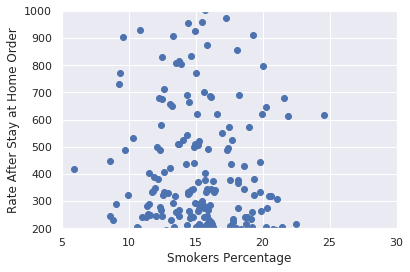

In [34]:
# Scatterplot Visualization of Smokers Percentage to Rate After Stay at Home Order
smokers = sth_inner['Smokers_Percentage']
after = sth_inner["Rate After Stay at Home Order"]
plt.scatter(smokers, after)
plt.ylim(200, 1000)
plt.xlim(5, 30)
plt.xlabel("Smokers Percentage")
plt.ylabel("Rate After Stay at Home Order")

Text(0, 0.5, 'EPL_POV')

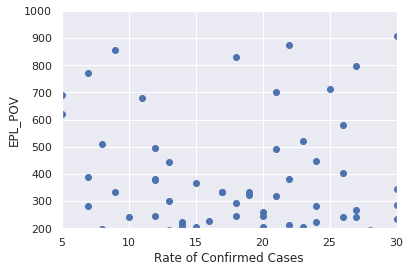

In [35]:
# Scatterplot Visualization of EPL_POV to Rate After Stay at Home Order
poverty = svi_merge['EPL_POV']
after = sth_inner["Rate After Stay at Home Order"]
plt.scatter(poverty, after)
plt.ylim(200, 1000)
plt.xlim(5, 30)
plt.xlabel("Rate of Confirmed Cases")
plt.ylabel("EPL_POV")

<Figure size 10800x10800 with 0 Axes>

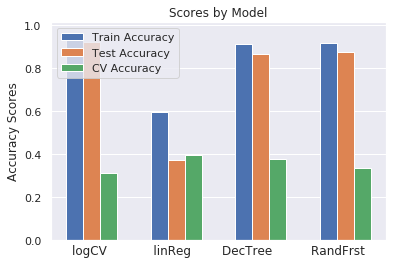

In [82]:
# Create a bar plot visualization of each of the Classification Models
plt.figure(figsize = (150,150))

labels = ['logCV', 'LinearReg', 'Decision_tree', 'Random_forest' ]

# Get values of training accuracy, testing accuracy, and cross validation score
accuracy = [0.9632558139534884,
            linear_model.score(X_train2, Y_train2),
            decision_tree.score(X_train2, Y_train2),
            random_forest.score(X_train2, Y_train2)]
test = [0.920824295010846,
        linear_model.score(X_test2, Y_test2),
        decision_tree.score(X_test2, Y_test2),
        random_forest.score(X_test2, Y_test2)]  
CV = [0.308805168598666,
      np.mean(cross_val_score(decision_tree, X_train2, Y_train2, cv = 10, scoring=rmse_score)),
      np.mean(cross_val_score(random_forest, X_train2, Y_train2, cv = 10, scoring=rmse_score)),
      np.mean(cross_val_score(linear_model, X_train2, Y_train2, cv = 10, scoring=rmse_score))]    

# Add labels and set width of each bar
x = np.arange(len(labels))
width = 0.20
            
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test, width, label='Test Accuracy')
rects3 = ax.bar(x + (1.5* width), CV, width, label='CV Accuracy')

plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_xlabel('logCV            linReg        DecTree          RandFrst')
ax.set_title('Scores by Model')
ax.legend()
plt.show()

## Predicted SIVPercentile with Best Features

In [37]:
# Use all training data to create a logistic regression model
log_model4 = LogisticRegressionCV(Cs = 2, fit_intercept = True, cv = 5, random_state = 42, max_iter = 10000)
X_train4 = SVI_feature_standardized.drop(columns=['SVIPercentile'])
Y_train4 = (SVI_feature_standardized.loc[:, 'SVIPercentile'])

log_model4.fit(X_train4, Y_train4)
Y_train_pred4 = log_model4.predict(X_train4)
Y_train_pred4    

array([0, 1, 0, ..., 1, 1, 1])

### Predicted SVIPercentile with Logistic Model

## Actual SVIPercentile (standardized into binary value)

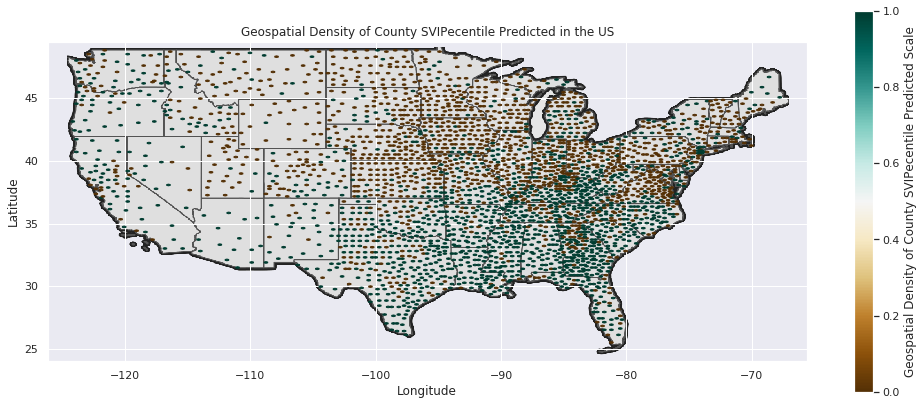

In [38]:
# Get the minimum and maximum longitudes and latitudes
min_lon = svi_merge['lon'].min()
max_lon = svi_merge['lon'].max()
min_lat = svi_merge['lat'].min()
max_lat = svi_merge['lat'].max()

# Create map boundaries and set the size of the resulting plot
map_bound = ((min_lon - 0.5, max_lon + 0.5, min_lat - 1, max_lat + 0.2))
fig, ax = plt.subplots(figsize = (17, 7))
basemap = plt.imread('./us.png')
ax.set_xlim(map_bound[0] - 1.5, map_bound[1] + 1.5)
ax.set_ylim(map_bound[2] - 0.5, map_bound[3] + 0.5)

# Create hexbin plot for rate of confirmed cases after stay at home order
plotplt = plt.hexbin(x=svi_merge['lon'],  y=svi_merge['lat'], cmap = 'BrBG',
                     C=Y_train_pred4, gridsize=200, 
                     vmin=0, vmax= 1)

color_scale = fig.colorbar(plotplt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Geospatial Density of County SVIPecentile Predicted in the US")
color_scale.ax.set_ylabel("Geospatial Density of County SVIPecentile Predicted Scale")

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal')
plt.show()

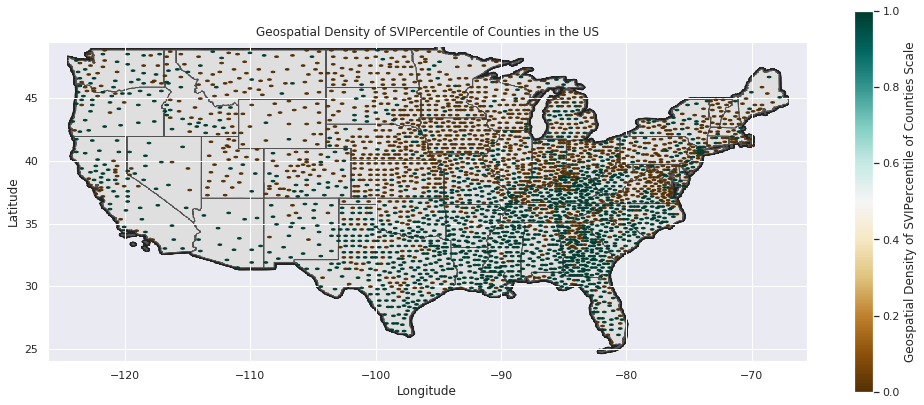

In [39]:
# Get the minimum and maximum longitudes and latitudes
min_lon = sth_inner['lon'].min()
max_lon = sth_inner['lon'].max()
min_lat = sth_inner['lat'].min()
max_lat = sth_inner['lat'].max()

sth_inner['SVIPercentile'] = [1 if i >=0.5 else 0 for i 
                                              in sth_inner['SVIPercentile']]

# Create map boundaries and set the size of the resulting plot
map_bound = ((min_lon - 0.5, max_lon + 0.5, min_lat - 1, max_lat + 0.2))
fig, ax = plt.subplots(figsize = (17, 7))
basemap = plt.imread('./us.png')
ax.set_xlim(map_bound[0] - 1.5, map_bound[1] + 1.5)
ax.set_ylim(map_bound[2] - 0.5, map_bound[3] + 0.5)

# Create hexbin plot for rate of confirmed cases after stay at home order
plotplt = plt.hexbin(x=sth_inner['lon'],  y=sth_inner['lat'], 
                     C=sth_inner['SVIPercentile'], gridsize=200, 
                     vmin=0, 
                     vmax=1, cmap = 'BrBG')
color_scale = fig.colorbar(plotplt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Geospatial Density of SVIPercentile of Counties in the US")
color_scale.ax.set_ylabel("Geospatial Density of SVIPercentile of Counties Scale")

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal')
plt.show()

### Analysis and Conclusion

What we found interesting is that there appears to be little to no correlation between the SVIPercentile, its factors, and the rate of confirmed cases. It was disappointing to see this because we would assume features like ‘F_AGE65’ (percent of people over 65) and ‘EPL_MOBILE’ (percent of the mobile home) entries would influence the rate of increase. Information like this would be used to mislead the severity of COVID-19 to the public. In the beginning, we generated a bar graph to see the rate of confirmed cases in each state by taking the rate of each county and taking the mean. We’ve analyzed that states with earlier social distancing enactment dates have higher confirmed cases rates; however, they also have higher confirmed rates before the enactment of social distancing. Therefore, we cannot assume that social distancing increases the rate of confirmed cases. Since this is to show that states with high confirmed cases have taken earlier measurements. And with the high initial cases, especially in New York, the increase of confirmed cases overtime is drastic. As of May 13th, we have not reached a peak for the confirmed cases all over the US, and therefore it’s ambiguous what’s the best precautionary. 

Therefore, social distancing cannot alone be the predictor of the rate of confirmed cases, so we look at variables going into the SVIPercentile of each county, with more than 30 Percentile correlation. Some of the best predictors for SVIPercentile based on our classifiers are ‘Smoker Percentage’, ‘EPL_Poverty’, and ‘EP_Mobile’. However, there is no correlation despite the hex map analysis of the SVIPercentile and rate of confirmed cases being inversely related. Even though our data shows high accuracy in the testing and training data, CV scores are low, CV scores tell the the ratio between the standard deviation and the mean. However we noticed that there are more than 2 percent differences between our test and train data, with low RSME. Since we predicted on a binary scale, our model is limited to what we can classify. In order to keep the classifier faster, we adjusted our scales, this has an influence on the specificity and sensitivity of our data. To fix that, it can be useful to use a more advanced back propagation classifier. By generating hex plots based on our classifiers and the actual SVIPercentile, we see that our classifiers did predict accurately the SVIPercentile per county based on our features. There is definitely correlation between SVIPercentiles, socioeconomic factors, household type, minority, and household composition/disabilities, however there appears to be no correlation between that SVIPercentile and rate of confirmed cases. Therefore, we cannot assume that by being a subset of individuals in the high SVIPercentile, there will be a higher chance of getting the virus. 